In [1]:
import pandas as pd
from helpermodules import memory_handling as mh


In [2]:
file = "2020-2024fedspeeches.pkl"
helper = mh.PickleHelper.pickle_load(file)
df_fed = helper.obj

file2 = "2020-2024prices.pkl"
helper = mh.PickleHelper.pickle_load(file2)
df_prices = helper.obj

file3 = "2020-2024speeches.pkl"
helper = mh.PickleHelper.pickle_load(file3)
df_speech = helper.obj

file4 = "2020-2024sentiment.pkl"
helper = mh.PickleHelper.pickle_load(file4)
df_sentiment = helper.obj 

In [3]:
from finaldataframe import process_fed_data 
df_speech_final , df_prices_final = process_fed_data(df_speech , df_prices, df_fed , df_sentiment)

When comparing df_speech with df_fed the drop ratio is 16.15598885793872 % 
We have dropped  58 values
the number of elements less than 5 mins long are 19
No price data found for speech: Strengthening the Community Reinvestment Act by Staying True to Its Core Purpose by Governor Lael Brainard on 2020-01-08 00:00:00
No price data found for speech: The Outlook for Housing by Governor Michelle W. Bowman on 2020-01-16 00:00:00
No price data found for speech: Financial Markets and Monetary Policy: Is There a Hall of Mirrors Problem? by Vice Chair Richard H. Clarida on 2020-02-21 00:00:00
No price data found for speech: Monetary Policy Strategies and Tools When Inflation and Interest Rates Are Low by Governor Lael Brainard on 2020-02-21 00:00:00
No price data found for speech: U.S. Economic Outlook and Monetary Policy by Vice Chair Richard H. Clarida on 2020-02-25 00:00:00
No price data found for speech: New Economic Challenges and the Fed's Monetary Policy Review by Chair Jerome H. Powell o

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
def density_distribution (df, info=None):
    df = df.dropna()
    sentiment_score=df.finbert_score
    sns.histplot(sentiment_score, kde=True, bins=20, color='purple', alpha=0.7)
    plt.title(f'Distribution of Sentiment Scores for {info}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Density')
    plt.show()

In [ ]:
df_speech_final

----

Density Distribution 

the most present names in the dataset are the following :

Governor Christopher J. Waller 13% , Governor Michelle W. Bowman 13% , Vice Chair for Supervision Randal K. Quarles 6% 

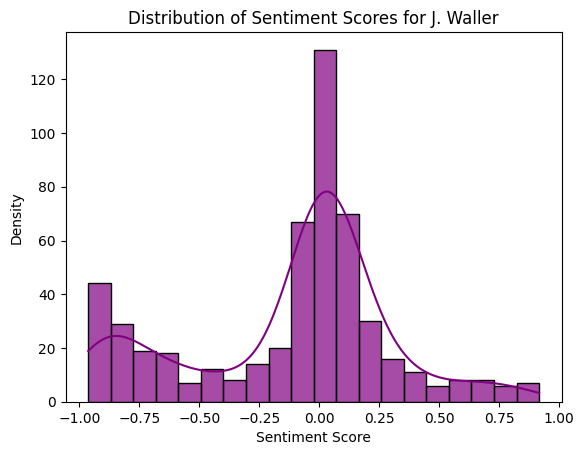

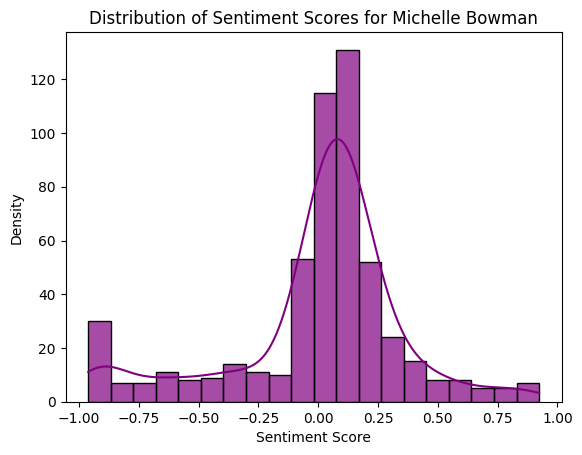

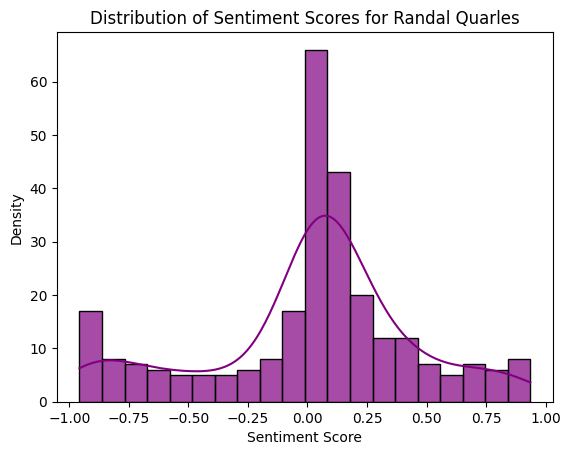

In [7]:
dfwaller = df_speech_final[df_speech_final['speaker']=='Governor Christopher J. Waller']
density_distribution(dfwaller , 'J. Waller')
dfbowman = df_speech_final[df_speech_final['speaker']=='Governor Michelle W. Bowman']
density_distribution(dfbowman, 'Michelle Bowman')
dfquarles = df_speech_final[df_speech_final['speaker']=='Vice Chair for Supervision Randal K. Quarles']
density_distribution(dfquarles , 'Randal Quarles')

year on year and overall

In [14]:
# 2020
df2020 = df_speech_final[(df_speech_final['date'] >= '2020-01-01') & (df_speech_final['date'] <= '2020-12-31')]

# 2021
df2021 = df_speech_final[(df_speech_final['date'] >= '2021-01-01') & (df_speech_final['date'] <= '2021-12-31')]

# 2022
df2022 = df_speech_final[(df_speech_final['date'] >= '2022-01-01') & (df_speech_final['date'] <= '2022-12-31')]

# 2023
df2023 = df_speech_final[(df_speech_final['date'] >= '2023-01-01') & (df_speech_final['date'] <= '2023-12-31')]

# 2024
df2024 = df_speech_final[(df_speech_final['date'] >= '2024-01-01') & (df_speech_final['date'] <= '2024-12-31')]


In [16]:
def density_distribution (df, info=None):
    df = df.dropna()
    sentiment_score=df.finbert_score
    sns.histplot(sentiment_score, kde=True, bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of Sentiment Scores for {info}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Density')
    plt.show()

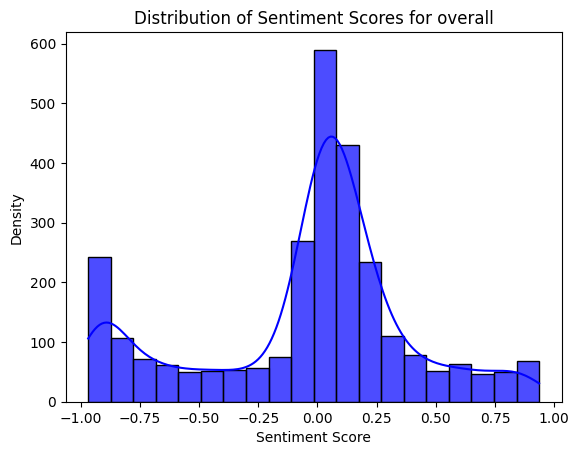

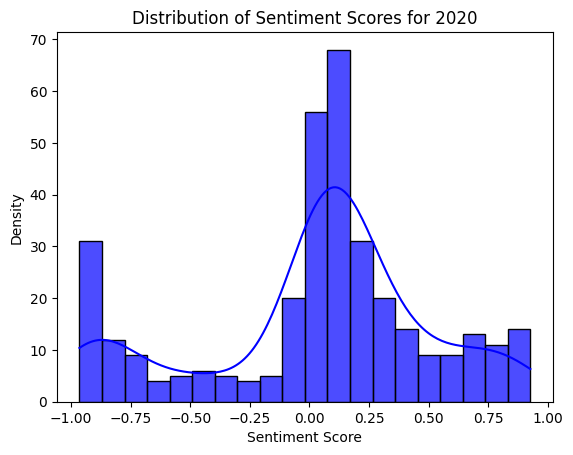

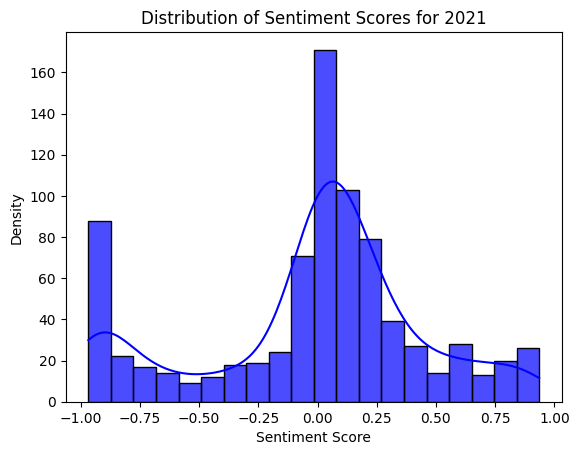

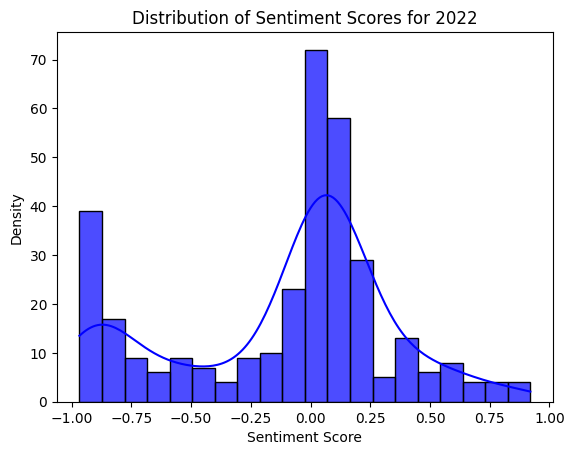

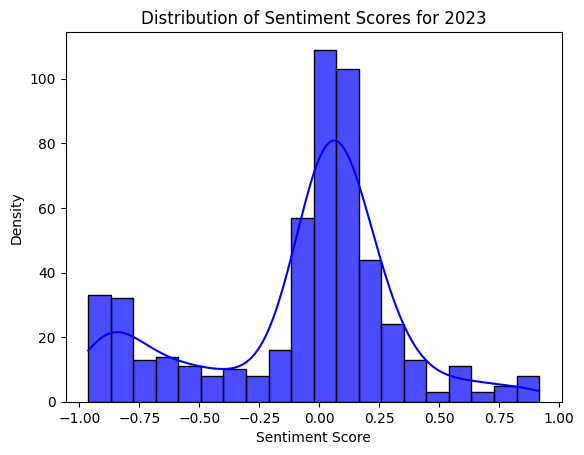

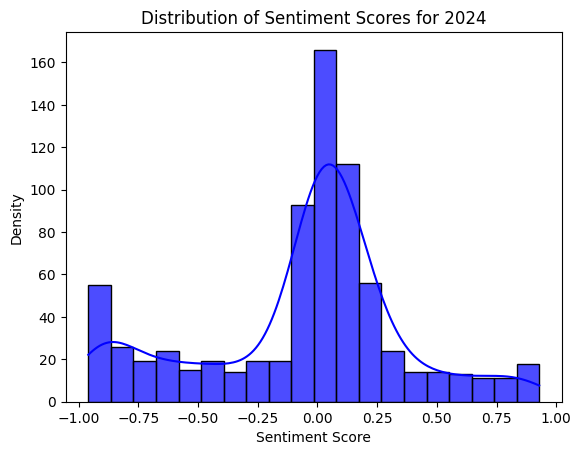

In [17]:
density_distribution(df_speech_final , 'overall')
density_distribution(df2020 , '2020')
density_distribution(df2021 , '2021')
density_distribution(df2022 , '2022')
density_distribution(df2023 , '2023')
density_distribution(df2024 , '2024')

----

Volume vs Sentiment for the top volatility speech 

In [33]:
def find_best_volatility(top_n, df_speech):
    # Drop rows with missing values
    df = df_speech.dropna()

    # Calculate the volatility (standard deviation of 'pct_change') for each unique link
    volatility_dict = {link: df[df['link'] == link]['pct_change'].std() for link in df['link'].unique()}

    # Convert to DataFrame and sort by volatility in descending order
    store_df = pd.DataFrame.from_dict(volatility_dict, orient='index', columns=['volatility'])
    store_df = store_df.sort_values(by='volatility', ascending=False)

    # Return the list of top N links with the highest volatility
    return store_df.head(top_n).index.tolist()

In [34]:
linklistvol = find_best_volatility(3, df_speech_final)

In [38]:
df_filtered = df_speech_final[df_speech_final['link'].isin(linklistvol)]
df_filtered

,date,speaker,title,link,text,timestamp,text_by_minute,finbert_score,pct_change,volume,close
453,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:00:00-04:00,Good morning. The challenge we face today is d...,-0.727975,-0.001141,882051,280.190000
454,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:01:00-04:00,"likely be very high, although temporary, level...",0.080033,-0.000928,832344,279.929990
455,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:02:00-04:00,"decisions about where we, as a society, should...",0.328611,0.001965,524668,280.480010
456,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:03:00-04:00,"that households, businesses, and state and loc...",0.134714,-0.000606,646926,280.310000
457,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:04:00-04:00,to solvent entities with the expectation that ...,0.098495,-0.002777,778798,279.531490
458,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:05:00-04:00,"When the spread of the virus is under control,...",0.676126,0.000460,596911,279.660000
459,2020-04-09,Chair Jerome H. Powell,COVID-19 and the Economy,/newsevents/speech/powell20200409a.htm,Good morning. The challenge we face today is d...,2020-04-09 10:06:00-04:00,difficult time.,-0.480772,-0.001780,1877399,279.162290
1310,2022-11-30,Chair Jerome H. Powell,Inflation and the Labor Market,/newsevents/speech/powell20221130a.htm,Today I will offer a progress report on the Fe...,2022-11-30 13:30:00-05:00,Today I will offer a progress report on the Fe...,-0.734357,0.004116,1625223,396.445010
1311,2022-11-30,Chair Jerome H. Powell,Inflation and the Labor Market,/newsevents/speech/powell20221130a.htm,Today I will offer a progress report on the Fe...,2022-11-30 13:31:00-05:00,personal consumption expenditures (PCE) inflat...,-0.525425,0.001198,908547,396.920010
1312,2022-11-30,Chair Jerome H. Powell,Inflation and the Labor Market,/newsevents/speech/powell20221130a.htm,Today I will offer a progress report on the Fe...,2022-11-30 13:32:00-05:00,a more accurate indicator of where overall inf...,-0.626221,-0.002281,774175,396.014801


In [35]:
import matplotlib.dates as mdates
def plot_volumevssentiment(df, linklist, interval=1, deltabefore = 5, deltaafter=4):
    """
    Plots the price, VWAP (Volume Weighted Average Price), VWAP bands, 
    and sentiment of an asset over time for each unique speech and date in the DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame containing the following columns:
            - 'timestamp': Time data (timestamps).
            - 'close': Asset's price data.
            - 'volume': Asset's volume data.
            - 'sentiment': Sentiment values (can have missing values).
            - 'title': Speech identifier.
            - 'date': Date of the data.
        interval (int): The interval (in minutes) used to set the time axis tick spacing.

    Returns:
        None: The function plots the time series of the price, VWAP, VWAP bands, 
              and sentiment for each unique speech and date.
    """


    # Filter df for rows where (title, date) matches the pairs in best_title_date_pairs
    df_filtered = df[df['link'].isin(linklist)]
    df = df_filtered
    # Iterate over unique combinations of speech and date
    for speech, date in df[['title', 'date']].drop_duplicates().itertuples(index=False):
        # Filter the DataFrame for the specific speech and date
        df_filtered = df[(df['title'] == speech) & (df['date'] == date)]

        # Assign variables
        time = df_filtered['timestamp']
        prices = df_filtered['close']
        volumes = df_filtered['volume']
        sentiment = df_filtered['finbert_score']

        # Handle missing sentiment values (exclude from plot)
        sentiment_valid = sentiment.dropna()
        time_sentiment = time[sentiment_valid.index]



        # Plotting
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Set the x-axis locator and formatter for time intervals
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=interval))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax1.tick_params(axis='x', rotation=45)

        # Plot volumes
        if deltaafter != 0:
            if deltabefore > 0:
                plt.plot(time[:deltabefore+1], volumes[:deltabefore+1], color="lightblue", linewidth=0.75)
            plt.plot(time[deltabefore:-deltaafter-1], volumes[deltabefore:-deltaafter-1], color="green", label = 'volume', linewidth=1.5)
            if deltaafter > 0:
                plt.plot(time[-deltaafter-2:], volumes[-deltaafter-2:], color="lightblue", linewidth=0.75)
        else:
            if deltabefore > 0:
                plt.plot(time[:deltabefore+1], volumes[:deltabefore+1], color="lightblue", linewidth=0.75)
            plt.plot(time[deltabefore:], volumes[deltabefore:], color="green", label='volume', linewidth=1.5)


        # Plot sentiment on a secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(time_sentiment, sentiment_valid, color='red', label='Sentiment', linewidth=2, linestyle='dashed')
        ax2.set_ylabel('Sentiment', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        # Title and labels
        date = date.date()
        ax1.set_title(f'Volume vs Sentiment score ("{speech}" on {date})')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Volume')

        # Rotate x-axis labels to make them readable
        plt.xticks(rotation=45)

        # Show the legends
        fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

        # Display the plot
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

In [ ]:
def fill_link_nan(df):
    # List of unique links
    unique_links = df['link'].dropna().unique()
    
    for link in unique_links:
        # Get the index positions of the link
        link_indices = df[df['link'] == link].index
        
        # Get the first and last index of the current link
        first_index = link_indices[0]
        last_index = link_indices[-1]
        
        # Update the first 5 rows and last 5 rows of the 'link' column with the current link
        df.loc[first_index - 5:first_index - 1, 'link'] = link  # First 5 rows before the first
        df.loc[last_index + 1:last_index + 5, 'link'] = link  # Last 5 rows after the last
    
    return df



In [ ]:
def fill_link_nan(df):
    # List of unique links
    unique_links = df['link'].dropna().unique()
    
    for link in unique_links:
        # Get the index positions of the link
        link_indices = df[df['link'] == link].index
        
        # Get the first and last index of the current link
        first_index = link_indices[0]
        last_index = link_indices[-1]
        
        # Update the first 5 rows and last 5 rows of the 'link' column with the current link
        df.loc[first_index - 5:first_index - 1, 'link'] = link  # First 5 rows before the first
        df.loc[last_index + 1:last_index + 5, 'link'] = link  # Last 5 rows after the last
    
    return df

In [ ]:
# Apply the function
df_nan_filled = fill_link_nan(df_speech_final)
plot_volumevssentiment(df_nan_filled, linklistvol)

-----

correlation study :

-> linear correlation 

-> cross-correlation 

-> R-squared (?)

In [30]:
#Here I want to study a little bit the correlation among the time series 
''' 
CONSIDERATIONS : Since the temporalization of the phrase is based on an assumption of x words per minute, 
it could be possible to observe shifts and misplacements of minute-by-minute phrases leading to 
non-exact results.

The Pearson correlation coefficient (often denoted as r) is a statistical measure that quantifies
the linear relationship between two variables. It ranges from -1 to 1. 

Here we decided to calculate the pearson coefficient between sentiment and price for each unique speech
and eventually averaging all the results by the length of each speech, since we can consider the longest
speeches to be the most statistically relevant  

'''
#Pearson Coefficient (linear correlation coefficient) 
import numpy as np 
from scipy.stats import pearsonr

def calculate_pearson_coefficient_pct(df_speech_final, linklist = None):
    #overall pearson coefficient 
    weightlist=[]
    pearsonlist=[]
    df=df_speech_final.dropna()
    if linklist is None:
        linklist = df.link.unique().tolist()
    i=0
    for link in linklist:
        try :
            i+=1
            #print(f'prova numero {i}')
            prices=df[df['link']==link]['pct_change']
            sentiment=df[df['link']==link]['finbert_score']
            pearson,_ = pearsonr(prices,sentiment)
            if not np.isnan(pearson):  # Skip NaN values
                weight = len(prices)
                pearsonlist.append(pearson)
                weightlist.append(weight)

        except Exception as e:
            print(f"Error processing link {link}: {e}")
            continue


    #print((pearsonlist))
    #print((weightlist))
    overall_score_t = np.average(pearsonlist, weights=weightlist)
    return overall_score_t

def calculate_pearson_coefficient(df_speech_final, linklist=None):
    #overall pearson coefficient 
    weightlist=[]
    pearsonlist=[]
    df=df_speech_final.dropna()
    if linklist is None:
        linklist = df.link.unique().tolist()
    i=0
    for link in linklist:
        try :
            i+=1
            #print(f'prova numero {i}')
            prices=df[df['link']==link]['close']
            sentiment=df[df['link']==link]['finbert_score']
            pearson,_ = pearsonr(prices,sentiment)
            if not np.isnan(pearson):  # Skip NaN values
                weight = len(prices)
                pearsonlist.append(pearson)
                weightlist.append(weight)

        except Exception as e:
            print(f"Error processing link {link}: {e}")
            continue


    #print((pearsonlist))
    #print((weightlist))
    overall_score_t = np.average(pearsonlist, weights=weightlist)
    return overall_score_t

In [ ]:
def find_longest_speech(top_n, df):
    # Drop rows with missing values
    df = df.dropna()
    
    # Calculate the length for each unique link
    length_dict = {link: df[df['link'] == link].shape[0] for link in df['link'].unique()}
    
    # Convert to DataFrame and sort by length in descending order
    store_df = pd.DataFrame.from_dict(length_dict, orient='index', columns=['length'])
    store_df = store_df.sort_values(by='length', ascending=False)
    
    # Return the list of top N links
    return store_df.head(top_n).index.tolist()

In [ ]:
linnklistlongest = find_longest_speech(3, df_speech_final)

In [ ]:
#1 pct_change vs sentiment
print(calculate_pearson_coefficient_pct(df_speech_final))
#2 close vs sentiment
print(calculate_pearson_coefficient(df_speech_final))
#3 pct_change vs sentiment for best volatility speeches 
print(calculate_pearson_coefficient_pct(df_top_vol))
#4 close vs sentiment for best volatility speeches
print(calculate_pearson_coefficient(df_top_vol))
#5 pct_change vs sentiment for longest speeches 
print(calculate_pearson_coefficient_pct(df_speech_final, linnklistlongest))
#6 close vs sentiment for longest speeches
print(calculate_pearson_coefficient(df_speech_final, linnklistlongest))


-0.00019093249694083366
0.029295626452838754
0.16845094114198877
-0.18822466166405447


In [40]:
# Cross-correlation 
'''
It computes the lagged correlation for different lagged values 
'''
from scipy.signal import correlate
import matplotlib.pyplot as plt

def compute_cross_correlation_pct(df_speech_final, max_lag=5, linklist=None):
    df = df_speech_final.dropna()
    if linklist is None:
        linklist = df.link.unique().tolist()

    plt.figure(figsize=(12, 6))

    for link in linklist:
        try:
            prices = df[df['link'] == link]['pct_change'].values
            sentiment = df[df['link'] == link]['finbert_score'].values

            # Normalize both series
            prices = (prices - np.mean(prices)) / np.std(prices)
            sentiment = (sentiment - np.mean(sentiment)) / np.std(sentiment)
            title = df[df['link'] == link]['title'].unique()


            # Compute cross-correlation
            cross_corr = correlate(prices, sentiment, mode="full")
            lags = np.arange(-len(prices) + 1, len(prices))

            # Limit to max_lag
            lag_range = (lags >= -max_lag) & (lags <= max_lag)
            lags = lags[lag_range]
            cross_corr = cross_corr[lag_range]

            # Plot each speech cross-correlation
            plt.plot(lags, cross_corr, label=f'Title {title}', alpha=0.6)

        except Exception as e:
            print(f"Error processing link {link}: {e}")
            continue

    plt.axvline(0, color='red', linestyle="--", label="Zero Lag")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Cross-Correlation")
    plt.title("Cross-Correlation between Sentiment and Percent Price Change")
    plt.legend()
    plt.grid()
    plt.show()

def compute_cross_correlation(df_speech_final, max_lag=5, linklist=None):
    df = df_speech_final.dropna()
    if linklist is None:
        linklist = df.link.unique().tolist()

    plt.figure(figsize=(12, 6))

    for link in linklist:
        try:
            prices = df[df['link'] == link]['close'].values
            sentiment = df[df['link'] == link]['finbert_score'].values
            title = df[df['link'] == link]['title'].unique()

            # Normalize both series
            prices = (prices - np.mean(prices)) / np.std(prices)
            sentiment = (sentiment - np.mean(sentiment)) / np.std(sentiment)

            # Compute cross-correlation
            cross_corr = correlate(prices, sentiment, mode="full")
            lags = np.arange(-len(prices) + 1, len(prices))

            # Limit to max_lag
            lag_range = (lags >= -max_lag) & (lags <= max_lag)
            lags = lags[lag_range]
            cross_corr = cross_corr[lag_range]

            # Plot each speech cross-correlation
            plt.plot(lags, cross_corr, label=f'Title {title}', alpha=0.6)

        except Exception as e:
            print(f"Error processing link {link}: {e}")
            continue

    plt.axvline(0, color='red', linestyle="--", label="Zero Lag")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Cross-Correlation")
    plt.title("Cross-Correlation between Sentiment and Close Price Change")
    plt.legend()
    plt.grid()
    plt.show()



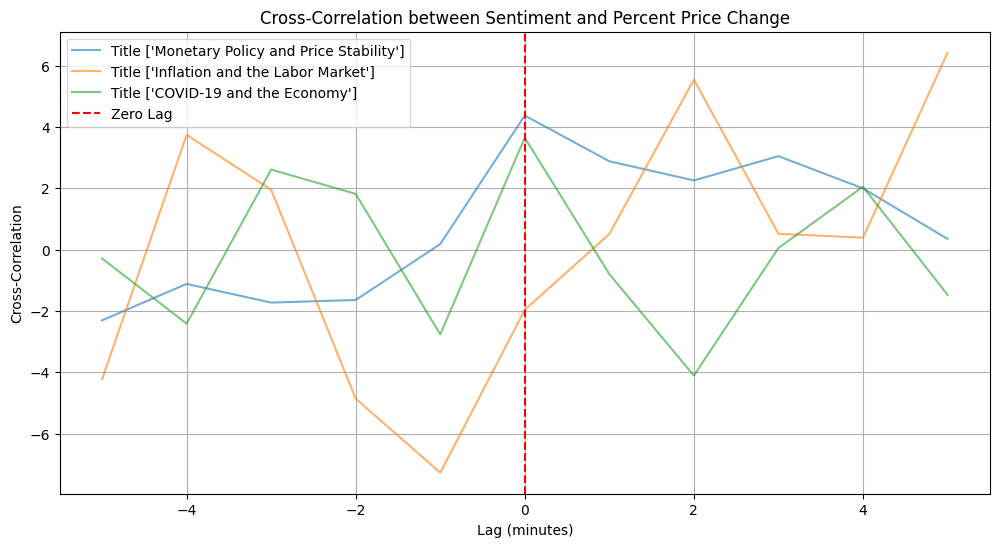

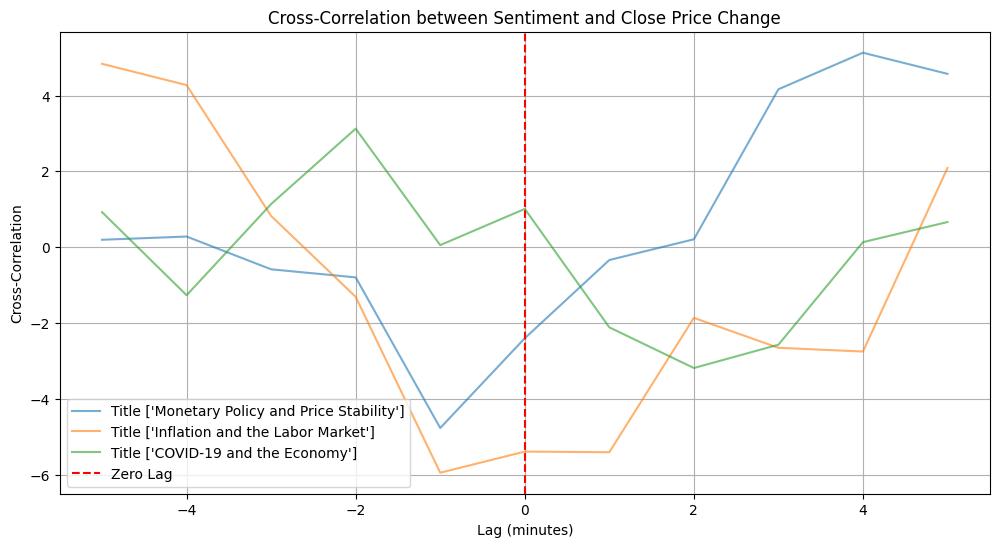

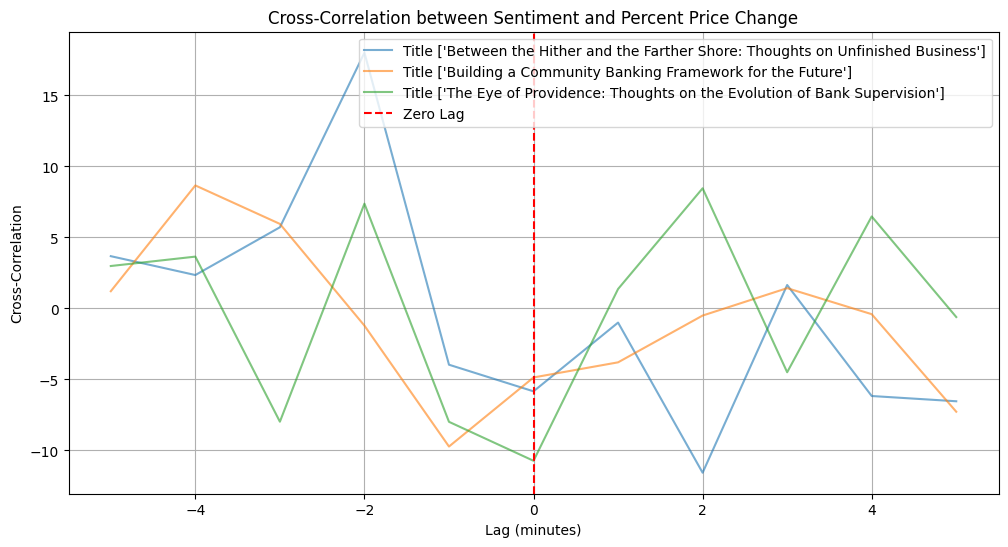

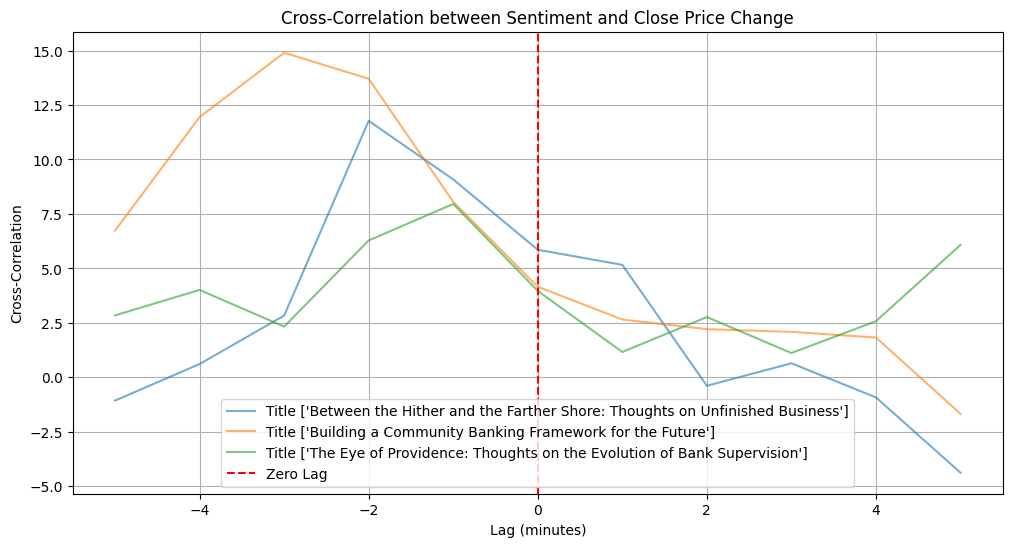

In [43]:
#1 pct_change vs sentiment (top volatility values)
compute_cross_correlation_pct(df_speech_final, linklist=linklistvol)
#2 close vs sentiment (top volatility values)
compute_cross_correlation(df_speech_final, linklist= linklistvol)
#3 pct_change vs sentiment (longest speeches)
compute_cross_correlation_pct(df_speech_final, linklist=linnklistlongest)
#4 close vs sentiment (longest speeches)
compute_cross_correlation(df_speech_final, linklist= linnklistlongest)

------

Calculating overall cross correlation for the whole dataset

In [116]:
def compute_weighted_cross_correlation_pct(df, max_lag=5):
    #df = df_speech_final.dropna()  I don't have to drop the NaNs since I need the before and after values
    linklist = df.link.unique().tolist()

    weighted_corrs = []
    weight_list = []
    lags_final = None

    for link in linklist:
        try:
            prices = df[df['link'] == link]['close'].values
            sentiment = df[df['link'] == link]['finbert_score'].dropna().values
            speech_length = len(sentiment)  # Number of data points

            # Cancel out speeches with less than 5 sentiment values
            if len(sentiment) < 5:
                continue
            print(f'processing the speech {df[df['link'] == link]['title'].unique()}')
            # Normalize both series
            prices = (prices - np.mean(prices)) / np.std(prices)
            print(f'this is the prices vector lenght {prices}')
            #sentiment = (sentiment - np.mean(sentiment)) / np.std(sentiment)
            print(f'and this is the sentiment vector lenght {sentiment}')

            # Compute cross-correlation
            cross_corr = correlate(prices, sentiment, mode="valid")
            print(f'cross_corr is {cross_corr}')
            lags = np.arange(-max_lag, max_lag + 1)

            # Limit to max_lag
            lag_range = (lags >= -max_lag) & (lags <= max_lag)
            lags = lags[lag_range]

            print(f'lag range is {len(lags)}')

            cross_corr = cross_corr[lag_range]
            print(f'cross_corr values are {cross_corr}')

              
            # Ensure the length of cross-correlation arrays is the same
            if lags_final is None:
                lags_final = lags
            else:
                # Pad the cross-correlation array to the length of the final lags
                if len(cross_corr) < len(lags_final):
                    cross_corr = np.pad(cross_corr, (0, len(lags_final) - len(cross_corr)), 'constant', constant_values=0)
                elif len(cross_corr) > len(lags_final):
                    cross_corr = cross_corr[:len(lags_final)]
            

            # Store weighted results
            weighted_corrs.append(cross_corr * speech_length)  # Multiply by weight
            weight_list.append(speech_length)

        except Exception as e:
            print(f"Error processing link {link}: {e}")
            continue

    # Compute weighted average
    weighted_corrs = np.array(weighted_corrs)
    print(f'weighted corrs are {weighted_corrs}')
    weighted_mean_corr = np.average(weighted_corrs, axis=0, weights=weight_list)


    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(lags_final, weighted_mean_corr, label="Weighted Mean Cross-Correlation", color='blue')

    plt.axvline(0, color='red', linestyle="--", label="Zero Lag")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Cross-Correlation")
    plt.title("Weighted Cross-Correlation between Sentiment and Price Change")
    plt.legend()
    plt.grid()
    plt.show()

In [105]:
def fill_link_nan(df):
    # List of unique links
    unique_links = df['link'].dropna().unique()
    
    for link in unique_links:
        # Get the index positions of the link
        link_indices = df[df['link'] == link].index
        
        # Get the first and last index of the current link
        first_index = link_indices[0]
        last_index = link_indices[-1]
        
        # Update the first 5 rows and last 5 rows of the 'link' column with the current link
        df.loc[first_index - 5:first_index - 1, 'link'] = link  # First 5 rows before the first
        df.loc[last_index + 1:last_index + 5, 'link'] = link  # Last 5 rows after the last
    
    return df

# Apply the function
df_nan_filled = fill_link_nan(df_speech_final)

In [ ]:
df_nan_filled

processing the speech [' Full Employment in the New Monetary Policy Framework']
this is the prices vector lenght [ 1.32955295  0.93837253 -0.12254359 -0.58901482 -0.53519122 -1.26311657
 -1.5742253  -2.1964635  -1.5742253   0.21460581 -0.21587932 -0.43355898
 -0.69281453 -1.47073672 -0.90011318 -0.7966246  -0.21681268 -0.0705867
  0.70824811  0.8108137   1.1219328   1.54723261  1.79602418  0.75896052
  1.07028703  0.34434247  0.49969461  0.56399255  0.39619565  0.55165149]
and this is the sentiment vector lenght [ 0.22836478  0.17041281  0.60008764 -0.8013763   0.12284752 -0.4823901
  0.85594666 -0.9229997   0.5493405   0.16912606  0.04627475 -0.9557912
 -0.95350003 -0.92299443 -0.9547059  -0.9088478   0.910636    0.56372494
  0.7961183  -0.04581982]
cross_corr is [ 5.55228485  5.28932922  4.8540907   4.49098118  2.63471948 -0.40772907
 -2.47645941 -5.14208113 -3.75064579 -4.67898206 -2.79242668]
lag range is 11
cross_corr values are [ 5.55228485  5.28932922  4.8540907   4.49098118  2.

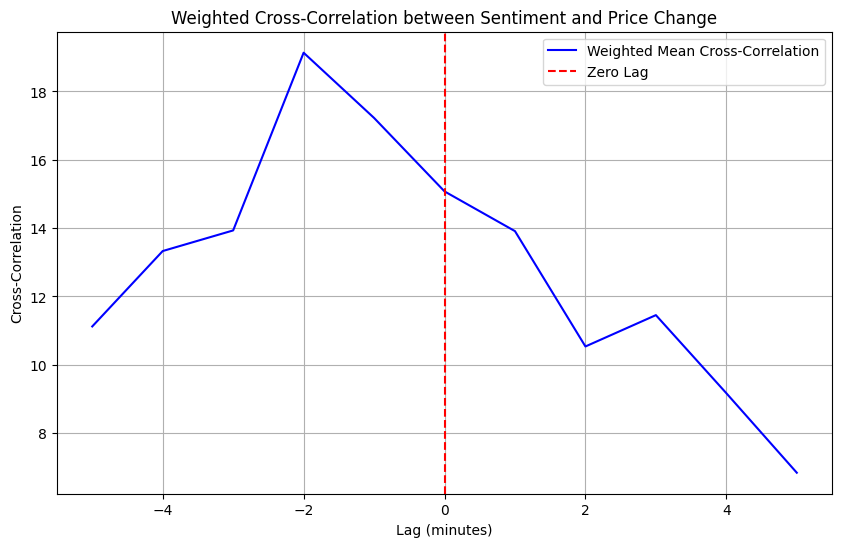

In [117]:
compute_weighted_cross_correlation_pct(df_nan_filled)

In [ ]:
#2 close vs sentiment
compute_cross_correlation(df_speech_final)

----

media giornaliera rendimenti vs media speech sentiment

possiamo plottare i rendimenti medi giornalieri del titolo e mettere di rosso le date dove ci sono state le speech, cambiando colore/size a seconda del valore assoluto 